In [1]:
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.colors as plt_cols

import matplotlib.pyplot as plt
import numpy as np
import pandas
import pickle
import time, json, requests, pprint, copy, math, dateutil
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh

import os

In [2]:
API_KEY=''

API_PREFIX_all = 'https://argovis-api.colorado.edu/'
API_PREFIX_drifters = 'https://argovisbeta01.colorado.edu/dapi/'

In [3]:
#fpath = os.path.expanduser('~/Downloads/')
fpath = '.'

In [4]:
startDate = '2019-08-13T00:00:00Z'
endDate = '2019-08-31T00:00:00Z'
# startDate = '2000-01-01T00:00:00Z'
# endDate = '2023-03-01T00:00:00Z'


dx = 1
dy = 1

x_edges = np.arange(-180,181,dx)
y_edges = np.arange(-90,91,dy)



In [5]:
# argo = requests.get(url,headers=headers).json()

In [6]:
def map_count_in_bins(name,x_edges,y_edges,dx,dy,fpath,startDate,endDate,vmin_map=1,vmax_map=1000):
    d = globals()[name] 
    lons = d['longitudes']#[x[1] for x in d]
    lats  = d['latitudes']#[x[2] for x in d]
    datetimes  = d['datetimes'] #[datetime.strptime(x[3][0:18]+'Z',"%Y-%m-%dT%H:%M:%SZ") for x in d]
    
    fig = plt.figure(figsize=(21, 7))
    
    h = np.histogram2d(lons, lats,[x_edges, y_edges])
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.pcolormesh(x_edges[0:-1]+dx/2, y_edges[0:-1]+dy/2, h[0].transpose(),  #60,
             transform=ccrs.PlateCarree(),norm=plt_cols.LogNorm(),vmin=vmin_map,vmax=vmax_map)

    ax.stock_img()
    ax.coastlines()
    
    plt.colorbar()

    plt.savefig(fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.png')
    plt.show()

### Number of profiles per bin for different products: query the info and create a map

The info to create the maps is also saved in a .pkl file.

In [7]:
def create_df(mydict_name,api_output):
    bfr = pandas.DataFrame(globals()[api_output])
    
    if 'geolocation' in bfr.keys():
        bfr['id'] = bfr.pop('_id')
        bfr['longitudes'] = bfr.pop('geolocation')
        bfr['latitudes'] = bfr['longitudes']
        bfr['longitudes'] = [x['coordinates'][0] for x in bfr['longitudes']]
        bfr['latitudes'] = [x['coordinates'][1] for x in bfr['latitudes']]
        bfr['datetimes'] = bfr.pop('timestamp')
        #if len(bfr.keys()) > 4:
        #    bfr['tags'] = bfr.pop(4)
        #print(bfr)
    else:
        bfr.rename( columns={0 :'id'}, inplace=True )
        bfr.rename( columns={1 :'longitudes'}, inplace=True )
        bfr.rename( columns={2 :'latitudes'}, inplace=True )
        bfr.rename( columns={3 :'datetimes'}, inplace=True )

    return bfr

tc
2023-03-10 00:11:07.658373
2023-03-10 00:11:08.160290


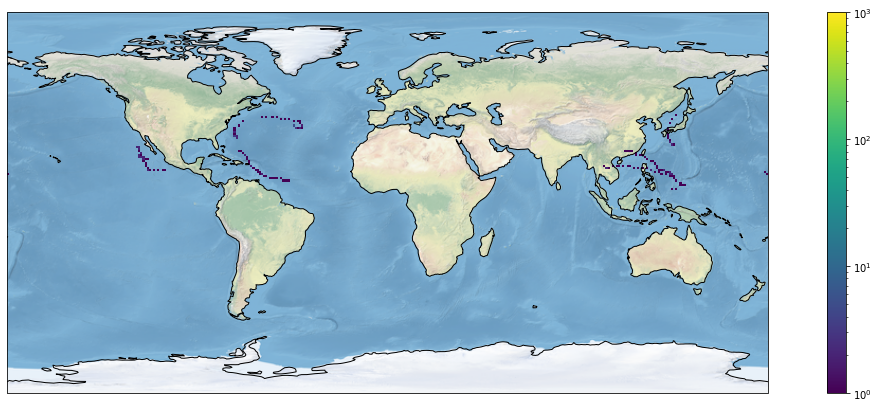

2023-03-10 00:11:09.227604
cchdo
2023-03-10 00:11:09.227731
2023-03-10 00:11:10.510026


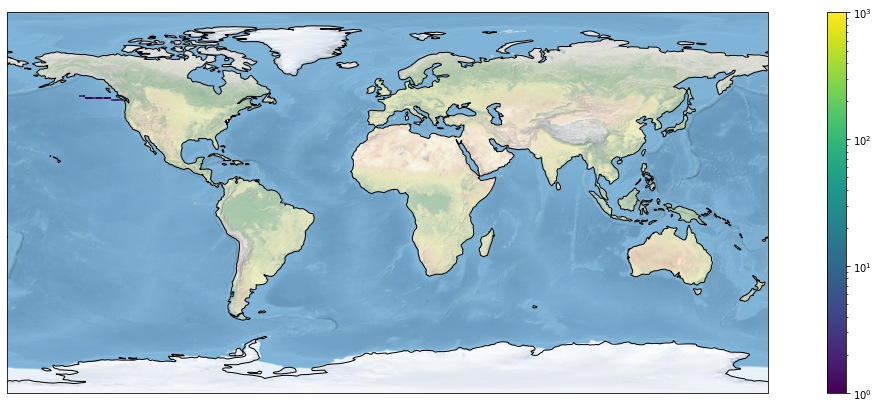

2023-03-10 00:11:11.238335
argo
2023-03-10 00:11:11.238446
2023-03-10 00:12:38.937008


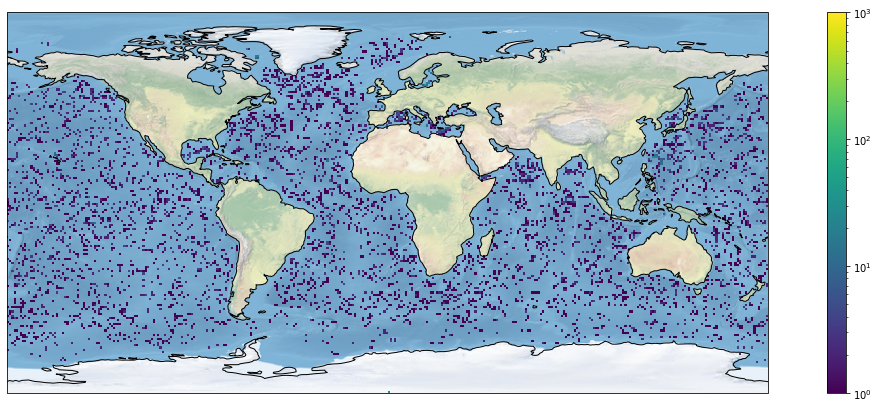

2023-03-10 00:12:39.766789


In [8]:
params = {
        'startDate': startDate,
        'endDate': endDate,
        'compression': 'minimal'
    } # 'compression': 'minimal'

for collection in ['tc','cchdo','argo']: #,'drifters'
    print(collection)
    if collection == 'drifters':
        API_PREFIX = API_PREFIX_drifters
    else:
        API_PREFIX = API_PREFIX_all
    print(datetime.now())
    globals()[collection] = avh.query(collection, options=params, apikey=API_KEY, apiroot=API_PREFIX)
    print(datetime.now())
    # create dataframe with columns of interest
    mydict_name = 'df_'+collection
    globals()[mydict_name] = create_df(mydict_name=mydict_name,api_output=collection)
    
    # save info to .pkl file
    output = open(fpath+mydict_name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
    pickle.dump(globals()[mydict_name], output)
    output.close()
    
    # plot map with count at each bin
    map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
    print(datetime.now())
    
# longitudes = [x['geolocation']['coordinates'][0] for x in d]
# latitudes  = [x['geolocation']['coordinates'][1] for x in d]

### Info saved in the .pkl files (in the previous cell) is used to create the maps again

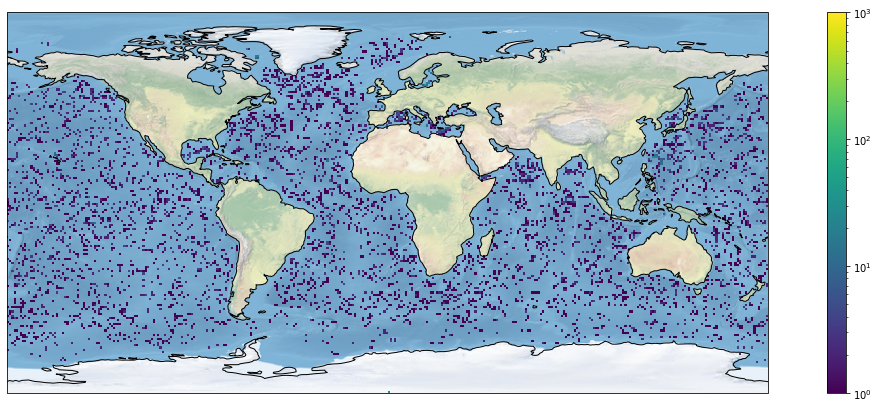

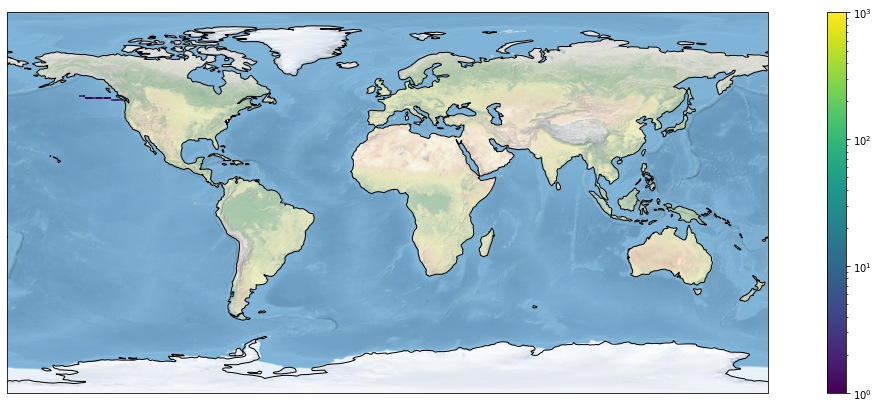

In [9]:
for name in ['df_argo','df_cchdo']: # ['df_tc','df_argo','df_cchdo','df_drifters']:
    if name not in globals():
        globals()[name] = pickle.load( open( fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', "rb" ) )
    map_count_in_bins(name=name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
        

In [10]:
# df_argo = pickle.load( open( fpath+"df_argo.pkl", "rb" ) )

### Plot number of profiles each year for Argo core, bgc, deep

all
2023-03-10 00:20:51.741676


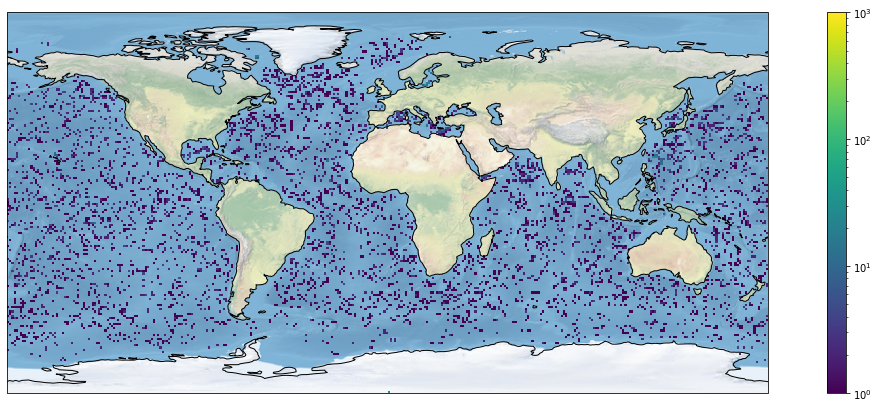

# of prof: 8129
2023-03-10 00:22:12.767277
core_only
2023-03-10 00:22:12.767306


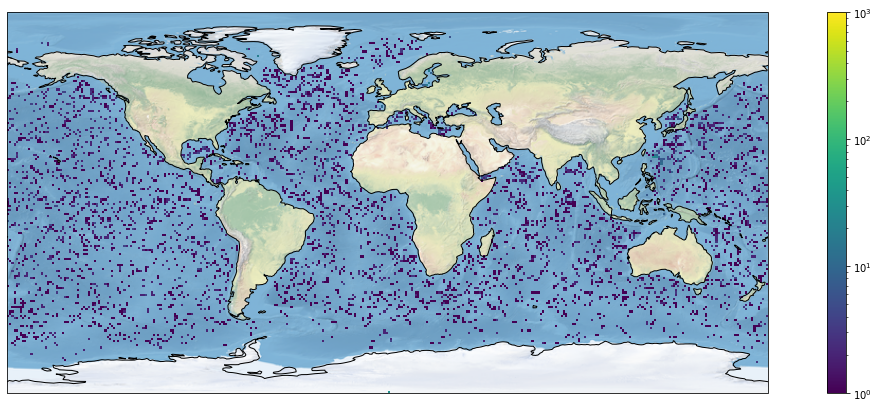

# of prof: 6976
2023-03-10 00:23:24.104758
bgc_only
2023-03-10 00:23:24.104790


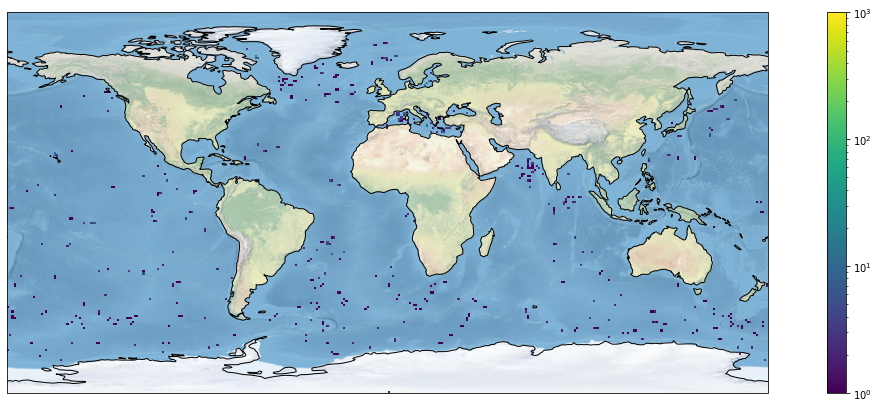

# of prof: 991
2023-03-10 00:23:33.904749
deep_only
2023-03-10 00:23:33.904776


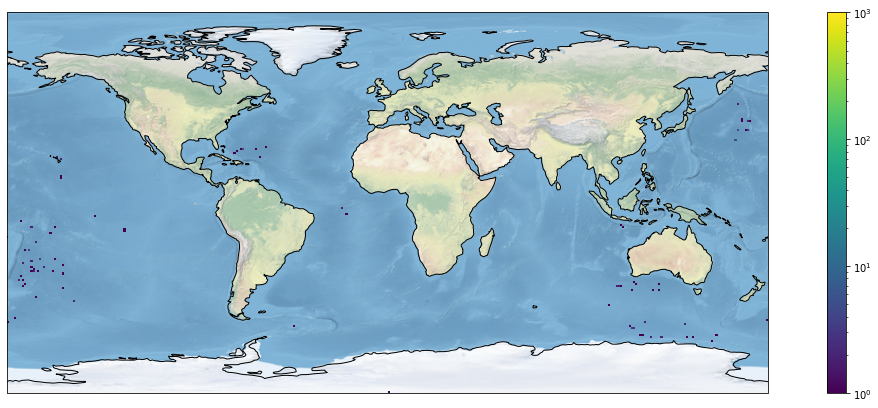

# of prof: 127
2023-03-10 00:23:35.160117
bgc_deep
2023-03-10 00:23:35.160137


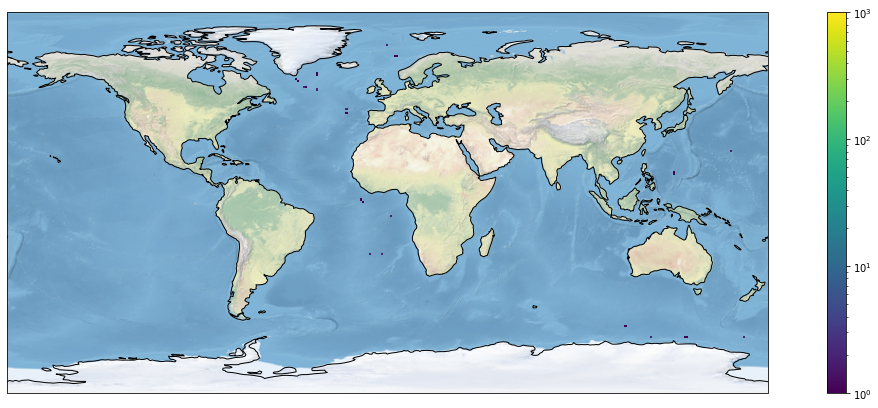

# of prof: 35
2023-03-10 00:23:36.296158


In [19]:
source_all      = ['argo_core','argo_core,~argo_bgc,~argo_deep',
                   'argo_bgc,~argo_deep','argo_deep,~argo_bgc',
                   'argo_bgc,argo_deep']
source_all_tags = ['all','core_only', 'bgc_only', 'deep_only', 'bgc_deep']
# tests:
# source_all      = ['argo_bgc,argo_deep,~argo_core','argo_bgc,argo_deep,argo_core']
# source_all_tags = ['no_core','bgc_deep_core']

for isource,itag in zip(source_all,source_all_tags):
    print(itag)
    print(datetime.now())
    params = {
        'startDate': startDate,
        'endDate': endDate,
        'source': isource,
        'compression': 'minimal'
    } # 'compression': 'minimal'
    
    globals()['argo_'+itag] = avh.query('argo', options=params, apikey=API_KEY, apiroot=API_PREFIX_all)
    
    if globals()['argo_'+itag]:
        mydict_name = 'df_'+'argo_'+itag
        globals()[mydict_name] = create_df(mydict_name=mydict_name,api_output='argo_'+itag)

        # save info to .pkl file
        output = open(fpath+mydict_name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
        pickle.dump(globals()[mydict_name], output)
        output.close()
    
        # plot map with count at each bin
        map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                          fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
        print('# of prof: ' + str(len(globals()[mydict_name])))
    
    else:
        print('No profiles!')
    print(datetime.now())
    